<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/importance%20cx-pipiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

In [2]:
Cl = '/content/cx_pipien equi.xlsx'
data= pd.read_excel(Cl,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [3]:
del data["Source"]
del data["CodeSite"]

In [4]:
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
207,-6.03333

In [5]:
(data[data["Cx_pipiens"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_pipiens  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.167180  27.157730           1  ...       4.2       3.6       3.8
4   -13.207000  27.165000           1  ...       4.6       3.8       3.9
5   -13.214230  27.166700           1  ...       4.4       3.6       3.8
6   -13.214230  27.166700           1  ...       4.4       3.6       3.8
7   -13.214230  27.166700           1  ...       4.4       3.6       3.8
..         ...        ...         ...  ...       ...       ...       ...
205  -5.333333  35.266667           1  ...       3.3       3.2       3.1
206  -5.218206  35.348765           1  ...       4.3       3.9       3.8
207  -6.033333  35.466667           1  ...       3.1       3.4       3.4
208  -5.366667  35.566667           1  ...       3.7       3.5       3.5
209  -5.833954  35.759465           1  ...       3.5       3.8       3.9

[105 rows x 226 columns]>

In [6]:
(data[data["Cx_pipiens"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_pipiens  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474           0  ...       5.4       5.5       4.9
1   -13.18837  27.13295           0  ...       4.3       3.7       3.8
2   -13.18837  27.13295           0  ...       4.3       3.7       3.8
10  -10.27508  29.08243           0  ...       3.5       3.5       3.4
11   -9.49015  29.21906           0  ...       3.8       3.2       3.1
..        ...       ...         ...  ...       ...       ...       ...
125  -6.20400  30.68600           0  ...       3.1       3.5       3.3
126  -6.23900  30.69500           0  ...       2.7       3.0       3.2
127  -6.91000  30.91300           0  ...       2.7       2.9       2.8
128  -6.86400  30.86600           0  ...       3.4       3.4       3.6
130  -4.98700  31.72800           0  ...       2.5       2.3       2.4

[105 rows x 226 columns]>

In [7]:
X1 = data.loc[:, data.columns != 'Cx_pipiens']
y1 = data.Cx_pipiens

In [8]:
X1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,85,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,95,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,93,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
20

In [9]:
y1

0      0
1      0
2      0
3      1
4      1
      ..
205    1
206    1
207    1
208    1
209    1
Name: Cx_pipiens, Length: 210, dtype: int64

In [10]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

GradientBoostingClassifier


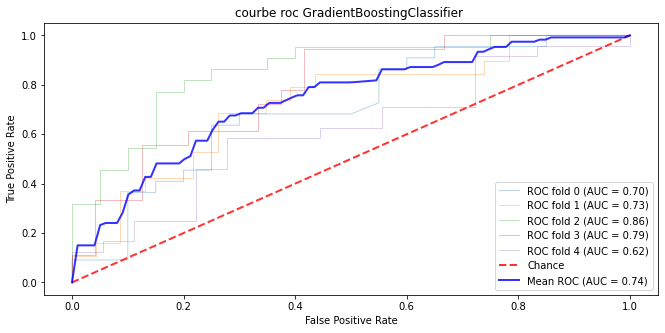

Accuracy: [0.66666667 0.64285714 0.78571429 0.69047619 0.57142857]
moy_accuracy: 0.67
precision: [0.68181818 0.625      0.7826087  0.61904762 0.6875    ]
moy_precision: 0.68
sensibilité : [0.68181818 0.52631579 0.81818182 0.72222222 0.45833333]
moy_sensibilité: 0.64
spécificité : [0.65       0.73913043 0.75       0.66666667 0.72222222]
moy_spécificité: 0.71
MCC : [0.33181818 0.2720637  0.57012876 0.38490018 0.18399502]
MCC: 0.35
balanced_accuracy : [0.66590909 0.63272311 0.78409091 0.69444444 0.59027778]
balanced_accuracy: 0.67
roc_auc : [0.70340909 0.72540046 0.86136364 0.78703704 0.61574074]
roc_auc: 0.74
cohen_kappa_scorec : [0.33181818 0.26914153 0.56947608 0.38095238 0.17105263]
cohen_kappa_scorec: 0.34


In [13]:
classifiers = {
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

In [14]:
features=X1.columns

In [15]:
features

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'ZonePel',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=225)

In [17]:
classifiers = {
 "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         model=clf.fit(X1.loc[train,], y1.loc[train,])
         importance = model.feature_importances_
         lst=[]
         print(i)
         for i,v in enumerate(importance):
              print('Feature: %s, Score: %.5f' % (features[i],v))
              lst.append(v)
         print(lst)
    #evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, y1, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

GradientBoostingClassifier
0
Feature: X_long, Score: 0.01127
Feature: Y_lat, Score: 0.01196
Feature: Bovins, Score: 0.00478
Feature: Volaille, Score: 0.00593
Feature: Caprins, Score: 0.00292
Feature: Ovins, Score: 0.00040
Feature: Equides, Score: 0.00255
Feature: Coniferes, Score: 0.00048
Feature: ZoneAride, Score: 0.00824
Feature: ZonePel, Score: 0.00019
Feature: Lesfeuillus, Score: 0.00000
Feature: Caduc, Score: 0.00076
Feature: Autres, Score: 0.00081
Feature: Arbrisseau, Score: 0.00046
Feature: Pl_herb, Score: 0.00030
Feature: VegCul, Score: 0.00074
Feature: VegInond, Score: 0.00000
Feature: ZoneUrbaine, Score: 0.00071
Feature: Moy_IRM, Score: 0.00527
Feature: Amp1_IRM, Score: 0.00431
Feature: Amp2_IRM, Score: 0.00298
Feature: Amp3_IRM, Score: 0.00084
Feature: VarT_ann_IRM, Score: 0.00725
Feature: VarT_bi_IRM, Score: 0.00259
Feature: VarT_tri_IRM, Score: 0.00132
Feature: VarT_Cy_IRM, Score: 0.00040
Feature: Min_IRM, Score: 0.00424
Feature: Max_IRM, Score: 0.00165
Feature: Ph1_IRM, S

# CV

In [19]:
lst1=[0.011270582176776558, 0.011955503905163627, 0.004779497389953745, 0.005927163231569661, 0.0029237629058904546, 0.00040182722038762574, 0.0025481705319132628, 0.0004825747831719577, 0.008242202443594802, 0.0001941192556304297, 0.0, 0.0007639478468448741, 0.0008129133498006558, 0.00045546330731184744, 0.00029795511635931745, 0.0007407350166932509, 0.0, 0.0007119262827792525, 0.005265966589308917, 0.004310870023975784, 0.002976913585049228, 0.0008373494759486487, 0.007251352668645698, 0.002590515065289881, 0.001322407267037768, 0.000397002086714718, 0.004237300902517167, 0.0016519894925851643, 0.0015321241599869817, 0.006938010673141437, 0.0033185772905915075, 3.1349529492085858e-09, 0.0006651528554841668, 0.0058634528192170535, 0.006521506754508925, 0.004699683629404167, 0.006458744135640763, 0.0001582540847731192, 3.891985430006332e-05, 0.0020927421464845036, 0.006935201538817064, 0.0014236940648307177, 0.004687064802717259, 0.001350172465245979, 0.0021164397408983066, 0.0034373922693408834, 0.019580390160519295, 0.004706036367685096, 0.0011870115952867164, 9.686074456316846e-05, 0.00769965205121453, 0.0014758234852198856, 0.0, 0.0037766029433587305, 0.008533639661804015, 0.003772957313161949, 0.0054111108050032015, 0.012244284985458917, 0.006438472986690183, 0.01063026239403334, 0.0007133077511433348, 0.013596965774605285, 0.009783704918665375, 0.003305432945568708, 0.0026713205353358083, 0.0004474512370333961, 0.0020092773270158834, 0.004346221578932933, 0.01478976601164915, 0.0020452420842337516, 0.011791338397520843, 0.006523173290570758, 0.00375820237282943, 0.009374390652838446, 0.01173476505588147, 0.0021010048520981317, 0.00660760834853302, 0.002419591880666784, 0.0026792928627324703, 0.008894570550777763, 0.0015940485612637154, 0.0031279680080580703, 0.006498792748198229, 0.005953714418464841, 0.0052178223324442375, 0.0038850254802107274, 0.008531907084250596, 0.0017978235593499375, 0.009477613358261054, 0.004476636088878641, 0.0018286856047201416, 0.006767853407138138, 0.002765166890359786, 0.004389855903506472, 0.002532499862058642, 0.0013766856180567643, 0.0004741301574513527, 0.0029555492161482413, 0.0023671879908139966, 0.00013583546895984484, 0.0012571924978336134, 0.002673735909296679, 0.004177271904802387, 0.0014857231797868132, 0.0027019156302051863, 0.0064794122025464244, 0.0022057246508513763, 0.00019636360214022778, 0.004439018925425006, 0.0016414635445851282, 0.0036017780053761387, 0.008533235430734091, 0.0016909831813135233, 0.0016267634435515885, 4.361179851250984e-05, 0.009422361149920268, 0.0035253907239203193, 0.002641844193885337, 0.006619942723206616, 0.004624130281908239, 0.0019361079336813124, 0.006427412691442467, 0.005181746675446157, 0.004528335775602659, 0.0017863850238276603, 0.0017944256501640063, 0.0005084751701231363, 0.005561782507440365, 0.0012368296600105948, 0.00024411337326571197, 0.009231943027562238, 0.000317830370770732, 0.004442128995914613, 0.004899288060248003, 0.007394105309201881, 0.0026435901085732887, 0.006171004920849243, 0.006181360612186512, 0.011239425334590368, 0.00030287658607782125, 0.005238186192188449, 0.005816442853022176, 0.009198313085591187, 0.0036618817648033973, 0.0029995000515430754, 0.0016173789296187288, 0.0011777861478806458, 0.0038878865549245023, 0.0033615341304443066, 0.007059926802023683, 2.7702800357596123e-05, 0.004153215246073754, 0.001281224789904106, 0.00474575282134217, 0.002406148320038029, 0.0003297917314558876, 0.009401056896993183, 0.00571024654242818, 0.002392059042784422, 0.0014592576125018481, 3.4579112372537696e-05, 0.00013656685602149291, 0.003523640167513878, 0.0059371431654658075, 0.009951197421729858, 0.010927255632711508, 0.014430515211690552, 0.007347163289588974, 0.0007327038194732288, 0.008098391399849875, 0.003537362018107036, 0.0038780870282783364, 0.0016069507210007923, 0.005495986171183941, 0.00402972867540457, 0.00029593605355439763, 0.0025623454758062977, 0.0033692247379919853, 0.002178376292385279, 0.008740147337701301, 0.00958020588654899, 0.009258177482893485, 0.003569105966338525, 0.011108649295946571, 0.011991475687284715, 0.005465800021133531, 0.007447006713965028, 0.004330719067757707, 0.0017250511339528625, 0.00595983951732188, 0.0024202273925010617, 0.004662014530752734, 0.0004991008150208115, 0.005336338482307145, 0.0033903873631205275, 0.0004930895627455877, 0.0036018513462658525, 0.0142613312194883, 9.661598977729154e-05, 0.0020334816995329717, 0.0012004951609660313, 0.000760791262550181, 0.004740027481657684, 0.009948780107736498, 0.0006383984638458719, 0.008548452323492245, 0.008919717239244698, 0.010157147399010814, 0.01109165927863316, 0.00036976670450351097, 0.0006987844311413228, 0.00044451968454606864, 0.005048170813999928, 0.010029942148865097, 0.011378332892185294, 0.008104155728545762, 0.00028452280963798523, 0.005102130480067015, 0.0035534464486790076, 0.002869055057514514, 0.010745859672116335, 0.013064369585194807, 0.0045506621261096015, 0.007601795090533212, 0.005675240741561374]

In [20]:
CV1=pd.DataFrame(lst1,columns=['cv1'])

In [21]:
CV1

,cv1
0,0.011271
1,0.011956
2,0.004779
3,0.005927
4,0.002924
...,...
220,0.010746
221,0.013064
222,0.004551
223,0.007602


In [22]:
CV1.to_excel('CV1.xlsx')

In [23]:
lst2=[0.0005719487823762894, 0.005539437664679029, 0.008414456375815985, 0.005760481767176775, 0.0037823102063763866, 0.002724976138482131, 0.008796459243334092, 1.5015594586053068e-05, 0.002032958175533722, 0.0013584361980774932, 0.0006414924963651166, 0.0008615636000550796, 0.005558207100399419, 0.002365111902524127, 4.0991632214281084e-05, 0.0007495751061415827, 0.0, 0.001061216544471347, 0.01226883976090026, 0.000470128314743437, 0.001634219815675178, 0.0034132854490464466, 0.011755153982920019, 0.0006760786739430131, 0.0003877795251488943, 0.004187994855661149, 0.0037082483741138553, 0.0030986476062540053, 0.0017055519453446776, 0.001018802099792134, 0.009854069082193632, 3.2777826820093316e-05, 0.00015308003260879126, 0.004817667461827373, 0.004390056150566382, 0.012304498306547581, 0.009847989674489124, 0.00012813828962359133, 8.24269141276688e-09, 0.0011603677437976457, 0.0055385430992724045, 0.006517311066529523, 0.0019353486376244434, 0.0010003308041983546, 0.004003523478013606, 0.00847199950405298, 0.0015329887612279007, 0.007919744681647118, 0.0015808337779020163, 0.0002426704901337079, 0.0049333750593374, 0.0010978522846426908, 0.0, 0.002822746036794259, 0.006729059813353949, 0.0032784358985715007, 0.008100720501833079, 0.008574630231664564, 0.002804450968873008, 0.0212083222892566, 0.0018539846468046985, 0.005597279086786272, 0.017304572749016107, 0.000328919483460382, 0.0002312827038663286, 0.0016032755189668941, 0.0019254898953370324, 0.005463487370192203, 0.006885013579679537, 0.000567908730982586, 0.003417814669611224, 0.00322548822803215, 0.0030092437263797367, 0.007890997941101896, 0.00845118247985384, 0.002298618630030338, 0.0016728595773290325, 0.000462674925111309, 0.00257426020408011, 0.008907040818300424, 0.00020039762465838998, 0.004064813798338517, 0.00591680777429623, 0.002863366511474139, 0.0017085048759662349, 0.00047808277639043714, 0.010066838182318743, 0.005879969197480626, 0.0073738104278832095, 0.008234028364615419, 0.0015807153378199564, 0.006875823241904167, 0.006720582973109604, 0.007581312545764321, 0.00980990494029831, 0.0018808904694714375, 0.00509993996072706, 0.001548868595531224, 0.0046731992748014995, 0.0010976396366779962, 0.0024900374686277265, 0.0003847010269123947, 0.005120528595154709, 0.007999141245232598, 0.004860775382766721, 0.002579267627098852, 0.003776655469576404, 0.00031230655410650595, 0.001053119727604863, 0.0021191090095843473, 0.005970921528120961, 0.00373235753345213, 0.007518310245324353, 0.0011807507785352252, 0.0046786284114077445, 0.01054813563427511, 0.02465337888701431, 0.0008602556986879709, 0.005450748961567302, 0.007144667072017709, 0.009152330612056267, 0.009056327146184488, 0.0013029775454994955, 0.009882031227065574, 0.0005535307976744636, 0.005826076304918083, 0.002537760360672768, 0.004571447001007636, 0.0028563725121860555, 0.0031127676900035922, 0.010323009415328972, 0.001810823285435353, 0.001162583124845438, 0.004943940092153948, 0.004006959027001157, 0.0016265159694533312, 0.009729778157761644, 0.003483718986063661, 0.0024865342755978235, 0.005935423919594755, 0.001713996044691253, 0.002572670750175287, 0.007946531320014725, 0.006510040830040144, 0.004640950449030536, 0.009621787635725765, 0.008103276306839807, 0.009105737127315704, 0.003187658655090129, 0.02732698075690042, 0.00030760497324159496, 0.0005870569155282808, 0.0020091291353031056, 0.0145836519937215, 0.0011092820534254165, 0.002513051402992726, 0.012700670011019141, 0.0042290361197128016, 0.0016417410149195126, 0.010323947142047719, 4.237072731878622e-05, 0.0002833817243905275, 0.0031729500909114567, 0.006523742266498625, 0.001019728905753056, 0.00224291223836391, 0.018880228896854853, 0.005073629060672547, 0.0003845187502056571, 0.0038609499764807728, 0.004132073676078308, 0.002031126978129004, 0.0013851177866716165, 0.008666505481363017, 0.003325978582406926, 0.0009299148129592921, 0.0018042061213015127, 0.012651896117592272, 0.0015103909300324314, 0.012759650592712788, 0.0051273151919273945, 0.00505655671122039, 0.0001833428795056718, 0.004468046465294126, 0.0033538890041266214, 0.003964221680979526, 0.0036287909188885757, 0.0026644029236292184, 0.0034830037273487283, 0.0024273512923930467, 3.452763626451722e-05, 0.004490582235984251, 0.000824477114507855, 0.0013593710289512833, 0.005444975579225788, 0.004571919310386267, 0.0007231071876238675, 0.01605043326403319, 0.000522527986914722, 7.535808945217263e-05, 0.002278827716453526, 0.002871209333306697, 0.014805071779565287, 0.002021481925753417, 0.0010050387206174813, 0.005582233563976062, 0.0008642751669187009, 0.004765426426421529, 0.008395611566943696, 0.003109813652232452, 7.385231414509694e-05, 0.002115002160402963, 0.0006546118919877776, 0.002339866030832223, 0.002605301326961579, 0.008241062573638993, 0.0006794069957929822, 0.0006996393889855756, 0.003031867372307238, 0.003931708148224449, 0.0009681282491428551, 0.020853493738704886, 0.0033289336589130913, 0.002705871804353892, 0.002499485000058359]


In [24]:
CV2=pd.DataFrame(lst2,columns=['cv2'])

In [25]:
CV2

,cv2
0,0.000572
1,0.005539
2,0.008414
3,0.005760
4,0.003782
...,...
220,0.000968
221,0.020853
222,0.003329
223,0.002706


In [26]:
CV2.to_excel('CV2.xlsx')

In [27]:
lst3=[0.005649554145321523, 0.005496728053834932, 0.0002698397947289751, 0.0028398921344650867, 0.0012645645713580253, 0.0077941967649760415, 0.009289285557591818, 8.257574796069665e-08, 0.0026600765831022548, 0.0020273362111651425, 0.0, 6.740062516463774e-06, 0.00028647047918075615, 0.0026648120201490802, 0.0012931549333135854, 0.005353523200903919, 0.0, 0.0005895764833073253, 0.009599117240073018, 0.001459600116575669, 0.0039555332698146956, 0.001865480431094992, 0.006195311733136441, 0.001123653204771194, 0.0002759370149619454, 0.0012391632994599154, 0.00524151453227026, 0.009453846182607452, 0.0012019677391064798, 0.0011765656131298777, 0.0071116399479048365, 0.0010944778774923134, 0.0011515109150712465, 0.0035903788560914304, 0.009790222539270038, 0.004947678262605939, 0.003111141495255707, 0.0035578195544658246, 8.86825050717839e-09, 0.0038573551176753385, 0.003874647951315378, 0.0009548434427905343, 0.005448440741606756, 0.000849438420451424, 0.010991455262990424, 0.0046093771990556075, 0.0062933695092632505, 0.00483295387304295, 0.0067886759585418024, 1.454197127821539e-05, 0.0017234011517304815, 0.0005854022176074415, 0.0, 6.2302955128525676e-06, 0.0017097400278382091, 0.004425064092147802, 0.007532297068111796, 0.0028082079544708306, 0.00018913076406452422, 0.005695990421754648, 0.000568952271881663, 0.007447736076529602, 0.00821053992807125, 0.002255615416597518, 0.0019189724668251121, 0.0023971468721921824, 0.0007938222841116986, 0.008939549225075004, 0.01858419232446664, 0.006801499042488931, 0.019647822319427025, 0.0033904898507363017, 0.004589038105001728, 0.0021348542153413, 0.01124646724375785, 0.005986188071882484, 0.006521150115597263, 0.0005375858778214666, 0.005055170988587255, 0.004144044325425555, 0.0003293311447148057, 0.006954926217914928, 0.002927121715886157, 0.009227358602200668, 0.0019093459835135141, 0.0011561836301784882, 0.013119291538263437, 0.019669775775013946, 0.007519277742278596, 0.0025864675449270187, 0.005842642352327567, 0.0029604999827685654, 0.006995647446131786, 0.008046682931885032, 0.0009163707642713477, 0.002199585707369295, 0.0035347985443374298, 0.0029825811019571664, 0.0013955141211896523, 0.0013466739493474163, 0.0023376084289527446, 0.0007482732032196914, 0.003598676435783216, 0.007115310625854832, 0.014647820373426138, 0.003690497835716568, 0.00250979234953756, 0.006290852806912539, 0.0018568968663453015, 0.004058482122730336, 0.009093787995186656, 0.006742132649533664, 0.0008259732122989864, 0.006510755074757646, 5.303143036124169e-05, 0.0023925053762754536, 0.01773200291692058, 0.004408054607310606, 0.006018918924641153, 0.0010099684254679193, 0.004603265817378464, 0.007012626362443328, 0.00235855856966958, 0.004039215043698666, 0.0003509974629844224, 0.004667528628378905, 0.003393806980312065, 0.007655706778273504, 0.003162919564270285, 0.0019853590576198554, 0.0043449128473123586, 0.0028866871156125636, 0.008023073570037896, 0.0042740706362009735, 0.005130471765868722, 0.0022509309140424233, 0.010282283912796099, 0.00586218799992976, 0.0032954986380132694, 0.0048195096416739, 0.0034422451192767036, 0.0037569392906334005, 0.007249493994153329, 0.002603471327417548, 0.00625434300548218, 0.0066964255822547, 0.016367540694728837, 2.6357642267592865e-06, 0.006463519441194105, 0.007923888448426585, 0.0001397725729624294, 0.001984386042906496, 0.0018167412236691405, 0.012677649476047215, 0.0010465426995330289, 0.0008626875151732136, 0.007642922158252596, 0.0018500195304665466, 0.0006440159167942781, 0.007441262202805644, 2.8241234452362377e-05, 0.0011594513078232132, 0.001640222137202367, 0.004990152427016932, 0.010490614755040156, 0.009829695546405353, 0.005580325833936328, 0.010214861316780507, 0.0010526366047087681, 0.006932063445616658, 0.0029304087274396053, 0.004461260312443474, 0.0007707304931168827, 0.0027404527187326177, 0.0007968989496268393, 0.001819287386625248, 0.0009423990388130064, 0.011488546500738401, 0.0012594085543098552, 0.0010860126273638025, 0.006512564498532645, 0.0032326896668251177, 0.0021953208786634256, 0.007099570826695108, 7.783384505081261e-05, 0.00431976648021469, 8.603646462725982e-05, 0.007081206507460233, 0.004298897751269151, 0.009643051642680141, 0.001748357590303696, 0.01592878730345698, 0.003640295114189803, 0.0006422172310214066, 0.0013959286006595764, 0.002542285474082207, 0.0020715400801657393, 0.0047326615474784315, 0.001564119964420618, 0.008298994105729266, 0.0015405233620451448, 0.003005448960125516, 0.009305137281767179, 0.004805977163695743, 0.0024038081816717383, 0.004544631791699355, 0.0012175278349714175, 0.010092657954925428, 0.017937470275301733, 0.002032975881204075, 0.00034825728389352017, 0.006107934388262752, 0.0012711370899543527, 0.0004177194621764237, 0.0036614381056361707, 0.009101531036461502, 0.002036949661672763, 0.0008131555914490452, 0.006006481817988317, 0.0006455227833386616, 0.004110456731739714, 0.019605631311388615, 0.004703796903364413, 0.0050938242541656385, 0.002346874900610013]


In [28]:
CV3=pd.DataFrame(lst3,columns=['cv3'])


In [29]:
CV3.to_excel('CV3.xlsx')

In [30]:
CV3

,cv3
0,0.005650
1,0.005497
2,0.000270
3,0.002840
4,0.001265
...,...
220,0.004110
221,0.019606
222,0.004704
223,0.005094


In [31]:
lst4=[0.0020063479154244514, 0.007439838416458335, 0.0026447227881796383, 0.015004913953266837, 0.009657327398832977, 0.0064995636279658936, 0.002378054200041221, 0.0010172660629923819, 0.008581550052212455, 0.0007317316010784339, 1.4746618654770395e-09, 0.00015372909087039087, 0.0014168619236115396, 0.001051516884482384, 0.0028369806858764128, 0.0018010469705817098, 0.0, 0.0019148035412686673, 0.002823843985995859, 0.004446831046282668, 0.005254623884079863, 0.003098997858098876, 0.009416510328297477, 0.005442173814647939, 0.0006541368052296951, 0.0008701717089968523, 0.005087901000363031, 0.006688175484849102, 0.0021584261064508162, 0.0005626645877003611, 0.0024469071633083928, 1.8210682742179299e-07, 0.0011631448088132291, 0.010198824647418952, 0.005703343354173229, 0.006553243909524717, 0.006476566940284872, 0.0019947169212012326, 5.2478893112448846e-05, 0.0013603867096008621, 0.0009405640571046122, 0.004626441187712165, 0.0067404458659543745, 0.002354329216234491, 0.0025248596036398442, 0.007394974596961353, 0.00852200517743812, 0.00822526130887639, 0.008914408433755704, 0.0025155110807509777, 0.0008953506196599687, 0.0007353882839652108, 0.00010390752157200758, 0.0021898503196191455, 2.701322588193455e-05, 0.008391380516427268, 0.004553682052549844, 0.002282083277313139, 0.0076563941522950355, 0.011626227120397306, 0.0012046932145761313, 0.010216666597480802, 0.002977046919375328, 0.0006673866310299006, 0.0007544010425336904, 0.003946346756107541, 0.00027684491133869894, 0.0073668735577223825, 0.009310720356252954, 0.0031615420366022467, 0.013205401989286087, 0.0035516053565759274, 0.004663819481774709, 0.002190402943565444, 0.006305435941239997, 0.00106927438686443, 0.004191385349210696, 0.0007195915987350558, 0.0017307150676871947, 0.0013928319112811607, 0.0004712899687641866, 0.005005883166142758, 0.0041374888188468505, 0.010264380155411843, 0.0026190142053706877, 0.007630866163201439, 0.0052176606905498845, 0.0022274314508551763, 0.004574656869372667, 0.0023104426552725452, 0.00032585260676824037, 0.007191088948687546, 0.007182832244825462, 0.006896108303054684, 0.006152814666469879, 0.004705417833299431, 0.0024514533293832725, 0.002153336467125741, 0.008588394807721398, 0.0003356731607347802, 0.0010338104102237567, 0.002209479056722886, 0.0031492991644177875, 0.004740419290292086, 0.012177040178216017, 0.0018959467082027054, 0.005224002550064814, 0.006178731611820353, 0.0035489704772690587, 0.0003610318315136595, 0.008767172110574012, 0.002362808129543523, 0.0005867037904578946, 0.00243360652697828, 0.0025929306590434346, 0.007407302652486776, 0.015846943245637263, 0.0010590095086368083, 0.0036258445921528775, 0.0025743473644624054, 0.0010620234825519613, 0.00862762039926284, 0.0017606123786888055, 0.00604402623733697, 0.0022518360129542073, 0.0018326675663640978, 0.008360953468285614, 0.006240228246318675, 0.0013875168757651098, 0.0006485407149673244, 0.009835134808779174, 0.0026292050478699354, 0.0031681472114247003, 0.0087468234157702, 0.0011225787284617828, 0.006191452571496675, 0.004883282239309153, 0.007477955642049463, 0.004392288677013055, 0.004736738304288514, 0.002759814697301065, 0.007346917458566489, 0.009552473839105732, 0.0020348729288560893, 0.006551357451587125, 0.004623972905574588, 0.011374416195372335, 0.0015010852937826582, 0.013971894800664778, 0.010478659226499232, 0.0007449470309319296, 0.002883174814388674, 0.0015414972929522763, 0.0020109954357794527, 0.0018912757958690813, 0.0003050040506865212, 0.00976830417766316, 0.004728205128035145, 0.0009111878341836005, 1.4051191475131879e-05, 7.74006890061165e-05, 0.000533888501361168, 0.004500590826284976, 0.006240984716712146, 0.003686291147703172, 0.009395928544018455, 0.007293912510907476, 0.0016184565000914766, 0.0014146858681280856, 0.004807064866114809, 0.0013223629572473292, 0.004348929090560857, 0.0027248388471514252, 0.010375390027229675, 0.004031552415406095, 0.011510665611849236, 0.0024299401006605964, 0.005306637319183613, 0.008689389256991625, 0.020599675237835544, 0.0037791328395819566, 0.0006606378975344422, 0.0034996856743666565, 0.007645902693115518, 0.012629442137050226, 0.002411236958625473, 0.00017568512637684844, 0.0035011918567744056, 0.0025759733749917556, 0.0007035062636904964, 0.000621675099863169, 0.005463281585915103, 0.0010270538772237012, 0.0028654075795982964, 0.004448387074807654, 0.0014891827115797605, 0.0021867635687386694, 0.010628516117734164, 0.0009003815427713559, 0.00405801898594529, 0.0014886015583954763, 0.0012936025612302643, 0.012723700797531962, 0.005830382714930867, 0.003236284595061286, 0.0056458117754976545, 0.005371201931573853, 0.007927251521540677, 0.023109947935053873, 0.002512851993920593, 0.0001998927280366399, 0.0062721809795116415, 0.007088592731900586, 0.0003284885196538817, 0.007020448581885593, 0.003379772806863823, 0.012777212747710612, 0.0005573508570428442, 0.003027486743187517, 0.0030912837859731566, 0.0013960065424520605, 0.011000743190288867, 0.0020458918349955902, 0.007960846608314883, 0.00020971768749597226]


In [32]:
CV4=pd.DataFrame(lst4,columns=['cv4'])

In [33]:
CV4.to_excel('CV4.xlsx')

In [34]:
CV4

,cv4
0,0.002006
1,0.007440
2,0.002645
3,0.015005
4,0.009657
...,...
220,0.001396
221,0.011001
222,0.002046
223,0.007961


In [35]:
lst5=[0.009242556587098001, 0.0016325019386940764, 0.0023533521307245947, 0.005085801745104475, 0.007851352062873027, 0.0031025861262076178, 0.002399020665781851, 0.0008600880698727971, 0.00019467013116634404, 0.00047591374523123464, 4.1385372623438744e-09, 7.263957497892457e-05, 0.003897751926607178, 0.0021526692429974753, 0.0002468951516230485, 0.001741290988398435, 0.0, 0.00010732271999816337, 0.0016033703581970044, 0.0005610869597002821, 0.0013832254433549427, 0.002822474633660146, 0.005308186597478247, 0.0027486416419852354, 5.417036736238253e-05, 0.001758076003919163, 0.005565674183965379, 0.005491812469108494, 0.001877510725367862, 0.0007603350299401321, 0.004545270021735493, 6.183399194369684e-07, 0.0014645942309826712, 0.0033865675972266653, 0.008989314168297867, 0.013320227230010896, 0.004108748472807484, 0.0007385084383751653, 2.698004296230482e-07, 0.0018741758709740544, 0.005418798817780729, 0.010474531468450817, 0.007853834133423868, 0.0023673630913133305, 0.004194158227849642, 0.009857062786574045, 0.011141730418881501, 0.0038219131720747747, 0.010273629278780276, 0.00014208578710086777, 0.0019715557963676062, 0.0016411763570686102, 7.873186464099106e-08, 0.002197489040972886, 0.0010093158618791353, 0.005724254949817509, 0.004103229843906869, 0.008758255590044698, 0.0025259858595475804, 0.010595245612451032, 0.0005719633083315804, 0.008286810044739553, 0.004017179863188658, 0.0029156852165176206, 0.0010995819985940665, 0.002352566266414924, 0.00015007703031572853, 0.0032537133316635704, 0.006643349499036355, 0.0012472006793701246, 0.005418694379464019, 0.006245964286057329, 0.0019075165710007945, 0.0024201398370856165, 0.011833120114570881, 0.003955532698593353, 0.01337712604483512, 0.0008593300793679116, 0.0018069560598089121, 0.011792574800504059, 0.00165545676897184, 0.003255284060760076, 0.0023568652304351264, 0.0043804783329538695, 0.0007245554316359288, 0.0014683553477870786, 0.00376378242519115, 0.003591651817046755, 0.007019224093568615, 0.008144278053364307, 0.0009925475934015567, 0.00101523642195551, 0.0030988708088327166, 0.004104158359311517, 0.003303897017920927, 0.013954156128703904, 3.904282253491699e-05, 0.0020530580919942663, 0.004048446016848319, 0.00014976447888841136, 0.003048251287044191, 0.003270681270875907, 0.004351457085994967, 0.005272203085359938, 0.004240706888327049, 0.0003871505340087935, 0.008946020814128264, 0.0005807412118010494, 0.00738742193389259, 0.0010718083629005417, 0.0034278340764147073, 6.42875713197995e-05, 0.005741271717118884, 0.005635547608635137, 0.0019837236929167593, 0.00042734876510318385, 0.0037752006032710774, 0.0035771228619023315, 0.00869447680759675, 0.004577222691366585, 0.007740727079780179, 0.00015099870539338306, 0.0028751073098279927, 0.0017528295991555759, 0.003984527152124605, 0.0032716796528744433, 0.003325023428495809, 0.007215024459982614, 0.0025961481509323477, 0.0022156585718028266, 0.003697090378676847, 0.0019101603271201994, 0.004834125667743056, 0.003112776314183038, 0.012457149739819902, 0.0024216615424198194, 0.0031082467584244338, 0.010624080147505077, 0.0076311781275933905, 0.0006179977958919023, 0.0018497118329180097, 0.007092778465336379, 0.010276762046497164, 0.007603174821964449, 0.0013227971576659002, 0.0009545732672451941, 0.0025999521166517893, 0.0008589823472833584, 0.0065480843414337155, 0.008517291344092204, 0.003009923730613427, 0.004179556953945415, 0.005501054819458975, 0.006973992215241914, 0.013206551124408888, 0.0006704914264411415, 0.0190059795028636, 0.011948174029922478, 0.0026320748360528796, 0.0030432347942311784, 0.00024920221946038277, 0.0009350840967533104, 0.005159729658930535, 0.010417541233648816, 0.005096968205410667, 0.021017506954216322, 0.015139278245305633, 0.005080309709057731, 0.0007963127921622881, 0.014151089643414614, 0.004099974649409539, 0.0018854924709837192, 0.008157376805298796, 0.0018471259945228085, 0.0012394186788068152, 0.00034369763492164056, 0.0010566079345739644, 0.009835338524582526, 0.003517559512958586, 0.004454817772289912, 0.016489522269984933, 0.0007068765822804639, 0.008027133090889718, 0.0145452711228313, 0.02475161070452291, 0.003209933498666737, 0.0011934760044849935, 0.008566023437020336, 0.0033219727952004544, 0.0041299782031945405, 0.0010706921183925022, 0.0013859134014892148, 1.620982407840824e-05, 0.0015063476168937452, 0.0012950661961138542, 0.0015766658258499634, 0.0028286794315917686, 0.015410502595227927, 0.008993816969981645, 0.005475573701004803, 0.0016046793841658683, 0.0022587080487518185, 0.011168989256485915, 0.0030091108635304812, 0.0017868449541006879, 0.004034340381483999, 0.004503864301883626, 0.009497886073981153, 0.006445547813404879, 0.003217309757425406, 0.0004938558930122679, 0.006630322034437564, 0.00411685809748479, 0.0005906595183232432, 0.009036618333271337, 0.004147680003794199, 0.0007826179783679945, 0.00032009824091971825, 0.005786244126031792, 0.002369453209464056, 0.006675606704673228, 0.008951995264164762, 0.0009929145888001943, 0.008636757376039129, 0.0010363669471884424]


In [36]:
CV5=pd.DataFrame(lst5,columns=['cv5'])

In [37]:
CV5.to_excel('CV5.xlsx')

In [38]:
CV5

,cv5
0,0.009243
1,0.001633
2,0.002353
3,0.005086
4,0.007851
...,...
220,0.006676
221,0.008952
222,0.000993
223,0.008637
